<a href="https://colab.research.google.com/github/hackergod00001/NLP-Video-Summarization-with-Watson-and-GPT/blob/master/Expt_12_MINI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Expt-12-MINI Project**
-------------------------
8881 : Natasha Lobo<br>
8875 : Upmanyu Jha<br>
8870 : Happy Cherian<br>
8868 : Nigel Fernandes<br>
8867 : Austin Fernandes<br>

-----------------------

**NLP-Video Summarization with Watson and GPT**






**1 Converting the Lecture to Audio file**

In [ ]:
!pip install -q ffmpeg
import ffmpeg


In [ ]:
!mkdir lecture
!mkdir audiochunk

mkdir: cannot create directory ‘lecture’: File exists


In [ ]:
!ffmpeg -i "/content/drive/My Drive/Statistical Learning course Intro2.mp4"   "/content/lecture/video1.wav"


ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

**2 Making Watson watch the lecture and study**

IBM Watson has limits on per file for Speech to text for free users based on file duration and size, so we divided 1-hour long lecture audio file into 6 different Audio files.

In [ ]:
!pip install -q pydub
import pydub
from pydub import AudioSegment
from pydub.utils import make_chunks

myaudio = AudioSegment.from_file("/content/lecture/video1.wav" , "wav") 
chunk_length_ms = 480000 
chunks = make_chunks(myaudio, chunk_length_ms) #Make chunks of one sec

#Export all of the individual chunks as wav files

for i, chunk in enumerate(chunks):
    chunk_name = "/content/audiochunk/chunk{0}.wav".format(i)
    chunk.export(chunk_name, format="wav")

Watson API credentials can be obtained from cloud.ibm.com and making a speech to text resource

In [ ]:
WATSON_API_KEY = 'zs4ACYiMZvX3vVkTgURcRp0AkKbXs7b3jsBkz22o8xHB'
WATSON_STT_URL = 'https://api.eu-gb.speech-to-text.watson.cloud.ibm.com/instances/99805ff3-87fe-4915-a919-80269dfc1973'


In [ ]:
!pip install -q ibm-watson


     |████████████████████████████████| 389kB 4.7MB/s 
     |████████████████████████████████| 204kB 15.0MB/s 


Making Watson listen to all the 6 chunks of audios we made and write into text,
Later we selected the very first alternative which has the most confidence level for accuracy.

In [ ]:
import os
from ibm_watson import SpeechToTextV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator


authenticator = IAMAuthenticator(WATSON_API_KEY)
speech_to_text = SpeechToTextV1(authenticator=authenticator)
speech_to_text.set_service_url(WATSON_STT_URL)

with open("/content/audiochunk/chunk0.wav", 'rb') as audio_file:
 response0 = speech_to_text.recognize(
            audio=audio_file,
            content_type='audio/{}'.format(os.path.splitext("/content/audiosplit/video1.wav")[1][1:]),
            model='en-US' + '_BroadbandModel',
            max_alternatives=1,
            ).get_result()

with open("/content/audiochunk/chunk1.wav", 'rb') as audio_file:
 response1 = speech_to_text.recognize(
            audio=audio_file,
            content_type='audio/{}'.format(os.path.splitext("/content/audiosplit/video1.wav")[1][1:]),
            model='en-US' + '_BroadbandModel',
            max_alternatives=1,
            ).get_result()

with open("/content/audiochunk/chunk2.wav", 'rb') as audio_file:
 response2 = speech_to_text.recognize(
            audio=audio_file,
            content_type='audio/{}'.format(os.path.splitext("/content/audiosplit/video1.wav")[1][1:]),
            model='en-US' + '_BroadbandModel',
            max_alternatives=1,
            ).get_result()

with open("/content/audiochunk/chunk3.wav", 'rb') as audio_file:
 response3 = speech_to_text.recognize(
            audio=audio_file,
            content_type='audio/{}'.format(os.path.splitext("/content/audiosplit/video1.wav")[1][1:]),
            model='en-US' + '_BroadbandModel',
            max_alternatives=1,
            ).get_result()


with open("/content/audiochunk/chunk4.wav", 'rb') as audio_file:
 response4 = speech_to_text.recognize(
            audio=audio_file,
            content_type='audio/{}'.format(os.path.splitext("/content/audiosplit/video1.wav")[1][1:]),
            model='en-US' + '_BroadbandModel',
            max_alternatives=1,
            ).get_result()



with open("/content/audiochunk/chunk5.wav", 'rb') as audio_file:
 response5 = speech_to_text.recognize(
            audio=audio_file,
            content_type='audio/{}'.format(os.path.splitext("/content/audiosplit/video1.wav")[1][1:]),
            model='en-US' + '_BroadbandModel',
            max_alternatives=1,
            ).get_result()

Writing results into the text file and merging results from all Audios to single text file named lecture.txt

In [ ]:
import json
with open('lecture0.json', 'w') as f:
    json.dump(response0, f, indent=2)
with open('lecture1.json', 'w') as f:
    json.dump(response1, f, indent=2)
with open('lecture2.json', 'w') as f:
    json.dump(response2, f, indent=2)
with open('lecture3.json', 'w') as f:
    json.dump(response3, f, indent=2)
with open('lecture4.json', 'w') as f:
    json.dump(response4, f, indent=2)
with open('lecture5.json', 'w') as f:
    json.dump(response5, f, indent=2)


In [ ]:
with open('lecture0.json','r+') as file:
    lecturedic = json.load(file)
for item in lecturedic['results']:
    print(item['alternatives'][0]['transcript'] +'.',file=open("lecture0.txt", "a"))
with open('lecture1.json','r+') as file:
    lecturedic = json.load(file)
for item in lecturedic['results']:
    print(item['alternatives'][0]['transcript'] +'.',file=open("lecture1.txt", "a"))
with open('lecture2.json','r+') as file:
    lecturedic = json.load(file)
for item in lecturedic['results']:
    print(item['alternatives'][0]['transcript'] +'.',file=open("lecture2.txt", "a"))
with open('lecture3.json','r+') as file:
    lecturedic = json.load(file)
for item in lecturedic['results']:
    print(item['alternatives'][0]['transcript'] +'.',file=open("lecture3.txt", "a"))
with open('lecture4.json','r+') as file:
    lecturedic = json.load(file)
for item in lecturedic['results']:
    print(item['alternatives'][0]['transcript'] +'.',file=open("lecture4.txt", "a"))
with open('lecture5.json','r+') as file:
    lecturedic = json.load(file)
for item in lecturedic['results']:
    print(item['alternatives'][0]['transcript'] +'.',file=open("lecture5.txt", "a"))

filenames = ['lecture0.txt', 'lecture1.txt','lecture2.txt','lecture3.txt','lecture4.txt','lecture5.txt']
with open('lecture.txt', 'w') as outfile:
    for fname in filenames:
        with open(fname) as infile:
            for line in infile:
                outfile.write(line)

In [ ]:
with open("lecture.txt", "r") as f:
    lines = f.readlines()
with open("lecture.txt", "w") as f:
    for line in lines:
        if line.strip("\n") != "%HESITATION":
            f.write(line)

**3 GPT 2 Model tuning**

GPT 2 is a causal text generation,pre-trained model from open AI, which works on prediction.

GPT-2 generates synthetic text samples in response to the model being primed with an arbitrary input. The model is chameleon-like — it adapts to the style and content of the conditioning text. This allows the user to generate realistic and coherent continuations about a topic of their choosing, — https://openai.com/blog/better-language-models/

In [ ]:
!pip install -q gpt2
!pip install -q git+git://github.com/huggingface/transformers/
!wget https://raw.githubusercontent.com/huggingface/transformers/master/examples/language-modeling/run_language_modeling.py

     |████████████████████████████████| 3.0MB 5.2MB/s 
     |████████████████████████████████| 1.1MB 23.9MB/s 
     |████████████████████████████████| 890kB 29.7MB/s 
--2020-09-10 23:50:08--  https://raw.githubusercontent.com/huggingface/transformers/master/examples/language-modeling/run_language_modeling.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11434 (11K) [text/plain]
Saving to: ‘run_language_modeling.py’

run_language_modeli 100%[===================>]  11.17K  --.-KB/s    in 0s      

2020-09-10 23:50:08 (66.9 MB/s) - ‘run_language_modeling.py’ saved [11434/11434]



In [ ]:
!mkdir output
!mkdir cache1
!mkdir cache2
#cache_d

In [ ]:
!python run_language_modeling.py --cache_dir=/content/cache1 --output_dir=/content/output --model_type=gpt2 --model_name_or_path=gpt2 --do_train --train_data_file=/content/lecture.txt --per_gpu_train_batch_size=1  --num_train_epochs=100


2020-09-11 00:35:25.600945: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
09/11/2020 00:35:27 - WARNING - __main__ -   Process rank: -1, device: cuda:0, n_gpu: 1, distributed training: False, 16-bits training: False
09/11/2020 00:35:27 - INFO - __main__ -   Training/evaluation parameters TrainingArguments(output_dir='/content/output', overwrite_output_dir=False, do_train=True, do_eval=False, do_predict=False, evaluate_during_training=False, prediction_loss_only=False, per_device_train_batch_size=8, per_device_eval_batch_size=8, per_gpu_train_batch_size=1, per_gpu_eval_batch_size=None, gradient_accumulation_steps=1, learning_rate=5e-05, weight_decay=0.0, adam_beta1=0.9, adam_beta2=0.999, adam_epsilon=1e-08, max_grad_norm=1.0, num_train_epochs=100.0, max_steps=-1, warmup_steps=0, logging_dir='runs/Sep11_00-35-27_f94671d6732b', logging_first_step=False, logging_steps=500, save_steps=500, save_total_limit=None, no_cuda

**4 Lecture Summary generation**

In [ ]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import torch
import numpy as np

OUTPUT_DIR = "/content/output"
device = 'cpu'
if torch.cuda.is_available():
    device = 'cuda'

tokenizer = GPT2Tokenizer.from_pretrained(OUTPUT_DIR)
model = GPT2LMHeadModel.from_pretrained(OUTPUT_DIR)
model = model.to(device)
                                        
def lecsum(input_str, length=200, n=5000):
  ids = torch.tensor(tokenizer.encode(input_str)).unsqueeze(0).long().to(device)
  model.eval()
  with torch.no_grad():
    for i in range(length):
      outputs = model(ids[:, -1024:], labels=ids[:, -1024:])
      loss, logits = outputs[:2]
      softmax_logits = torch.softmax(logits[0,-1], dim=0)
      next_token_id = choose_from_top(softmax_logits.to('cpu').numpy(), n=n)
      ids = torch.cat([ids, torch.ones((1,1)).long().to(device) * next_token_id], dim=1)
    output_list = list(ids.squeeze().to('cpu').numpy())
    lecsum = tokenizer.decode(output_list)
    return lecsum

def choose_from_top(probs, n=2):
    ind = np.argpartition(probs, -n)[-n:]
    top_prob = probs[ind]
    top_prob = top_prob / np.sum(top_prob) # Normalize
    choice = np.random.choice(n, 1, p = top_prob)
    token_id = ind[choice][0]
    return int(token_id)

lecturegen = lecsum(" Lecture Summary  \n")


**Result**

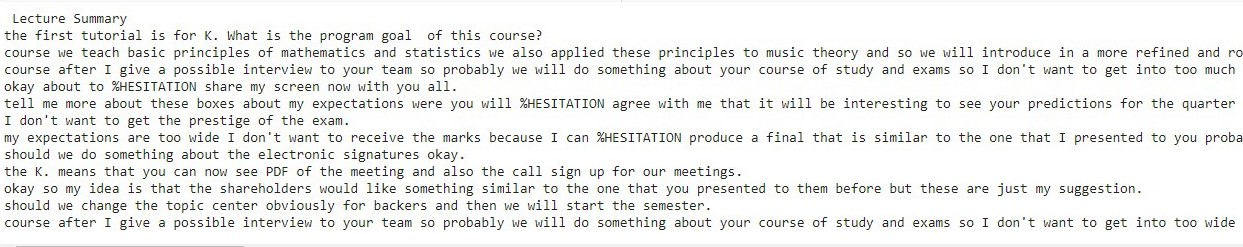